In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data =data_df[['sepal_length','sepal_width','petal_length','petal_width']]
target = data_df['species']

### PCA using Manual method. Eigen value decomposition

In [5]:
def standardisation(data):
    z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
    return z

def covariance_matrix(data,ddof=0):
    n_samples = data.shape[0]
    covmat = np.dot(data.T, data) / (n_samples-ddof)
    return covmat

def cal_eigen_values(covmat,n_components):
    #Calculating eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covmat)

    #Sorting eigenvalues in decending order
    selected_indexes = np.argsort(eigenvalues)[::-1][:n_components]

    #Selecting columns based on the number of components
    selected_Vectors = eigenvectors[:,selected_indexes]
    return selected_Vectors
        
def projection(std_data,eigenvectors):
    p = np.dot(std_data,eigenvectors)
    return p

In [6]:
std_data=standardisation(data)

In [18]:
cov_mat=covariance_matrix(std_data)
cov_mat.shape

(4, 4)

In [10]:
eigen_vectors=cal_eigen_values(cov_mat,3)

In [11]:
p=projection(std_data,eigen_vectors)
p.shape

(150, 3)

In [12]:
principalDf = pd.DataFrame(data = p, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, data_df['species']], axis = 1)

In [13]:
finalDf.head(2)

,principal component 1,principal component 2,principal component 3,species
0,-2.264542,-0.505704,-0.121943,setosa
1,-2.086426,0.655405,-0.227251,setosa


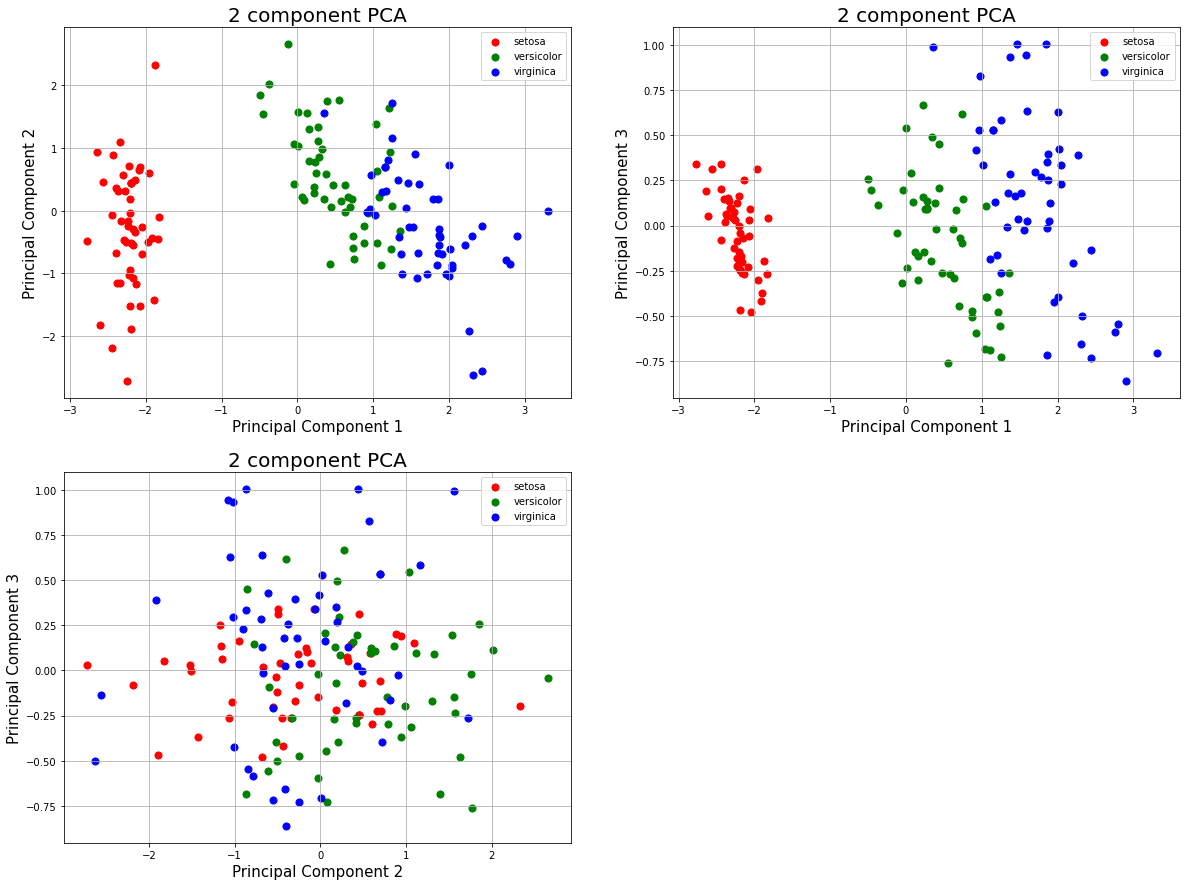

In [14]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

ax2 = fig.add_subplot(2,2,2) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 3', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax2.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

ax3 = fig.add_subplot(2,2,3) 
ax3.set_xlabel('Principal Component 2', fontsize = 15)
ax3.set_ylabel('Principal Component 3', fontsize = 15)
ax3.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax3.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax3.legend(targets)
ax3.grid()

### PCA using Sklearn libraries

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pricipal_components = pca.fit_transform(std_data)
principalDf = pd.DataFrame(data = pricipal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [16]:
finalDf = pd.concat([principalDf, data_df['species']], axis = 1)
finalDf.head(2)

,principal component 1,principal component 2,principal component 3,species
0,-2.264542,0.505704,-0.121943,setosa
1,-2.086426,-0.655405,-0.227251,setosa


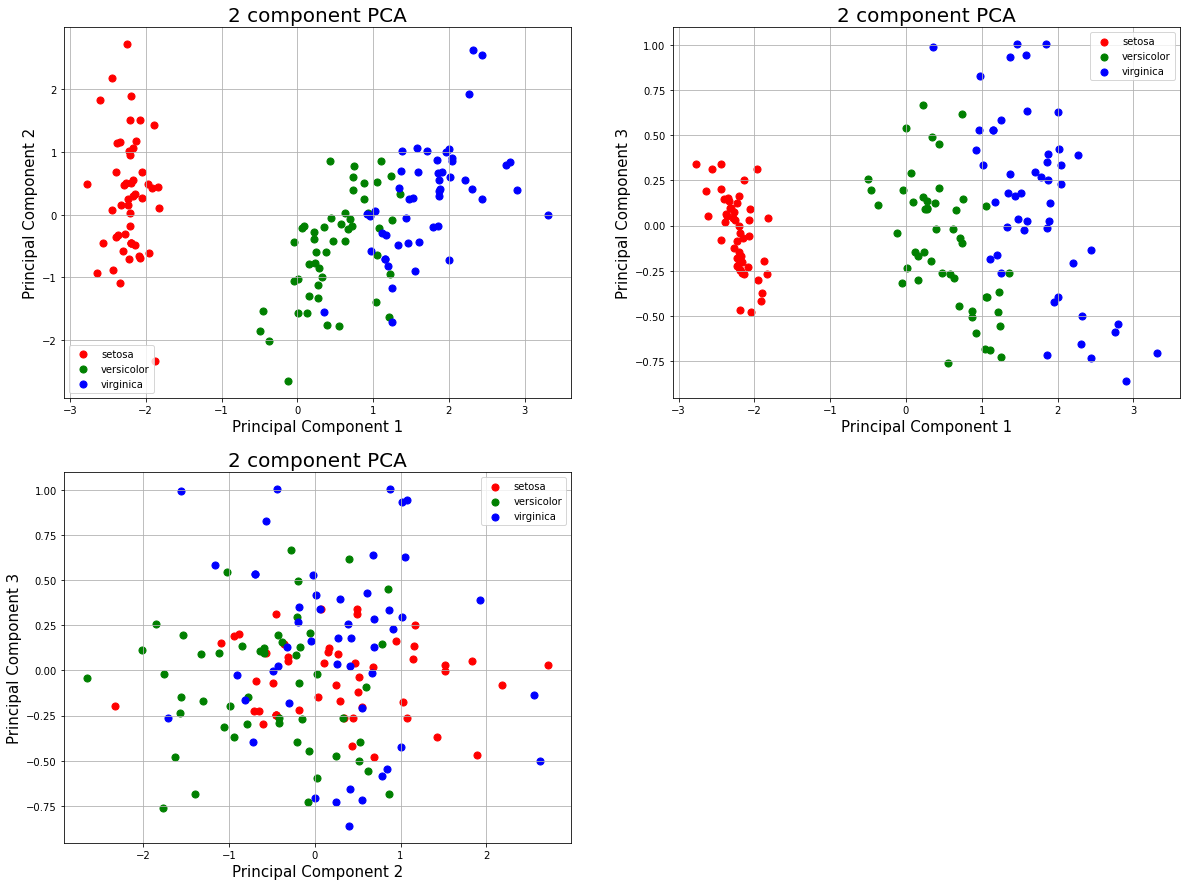

In [17]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

ax2 = fig.add_subplot(2,2,2) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 3', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax2.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

ax3 = fig.add_subplot(2,2,3) 
ax3.set_xlabel('Principal Component 2', fontsize = 15)
ax3.set_ylabel('Principal Component 3', fontsize = 15)
ax3.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['species'] == target].index
    ax3.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax3.legend(targets)
ax3.grid()